In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
fname_perf = '/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/cosmo_results/posteriors/csv/' + \
             'chains_DDF_perfect_validation_lowz_withbias.csv.gz'
data_perf = pd.read_csv(fname_perf)
data_perf['sample'] = 'Perfect'

fname_val = '/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/cosmo_results/posteriors/csv/' + \
            'chains_DDF_validation_lowz_withbias.csv.gz'
data_val = pd.read_csv(fname_val)
data_val['sample'] = 'Full validation'

fname_unc_b1 = '/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/cosmo_results/posteriors/csv/' + \
                'chains_UncSampling_20_batch1_lowz_withbias.csv'
data_unc_b1 = pd.read_csv(fname_unc_b1)
data_unc_b1['sample'] = 'UncSampling batch 1'

fname_rand_b1 = '/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/cosmo_results/posteriors/csv/' + \
                'chains_RandomSampling_20_batch1_lowz_withbias.csv'
data_rand_b1 = pd.read_csv(fname_rand_b1)
data_rand_b1['sample'] = 'RandomSampling batch 1'

data = pd.concat([data_perf, data_val, data_rand_b1, data_unc_b1], ignore_index=True)

In [3]:
queries_rand_bN = pd.read_csv('/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/' + \
                              'learn_loop_results/cosmo_samples/RandomSampling_' + \
                              '20_batch1.csv')

print('number objs RandomSampling: ', queries_rand_bN.shape[0])

queries_unc_bN = pd.read_csv('/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/' + \
                             'learn_loop_results/cosmo_samples/UncSampling_20_batch1.csv')

print('number objs UncSampling: ', queries_unc_bN.shape[0])

number objs RandomSampling:  1020
number objs UncSampling:  1366


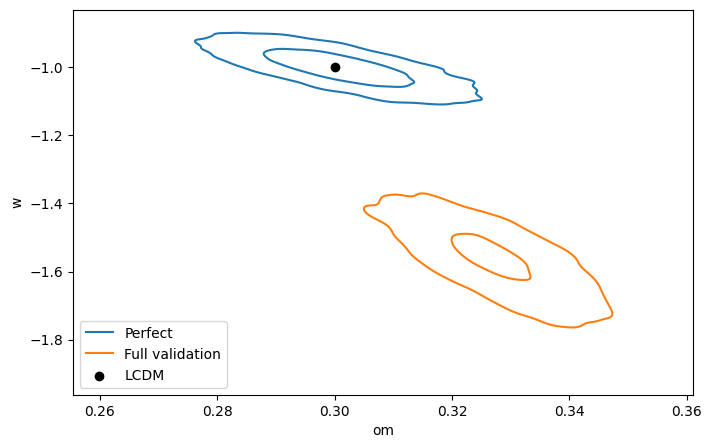

In [4]:
data_short = pd.concat([data_perf, data_val], ignore_index=True)

_, ax = plt.subplots(figsize=(8, 5))


g = sns.kdeplot(data=data_short, x="om", y="w", levels=3, hue='sample', ax=ax)
p = ax.scatter(0.3, -1, marker='o', color='black', label='LCDM')

extra_legend_elements = [p]
handles = ax.legend_.legend_handles

for h, t in zip(handles, ax.legend_.texts):
    h.set_label(t.get_text())  # assign the legend labels to the handles
ax.legend(handles=handles + extra_legend_elements, loc="lower left")
plt.show()

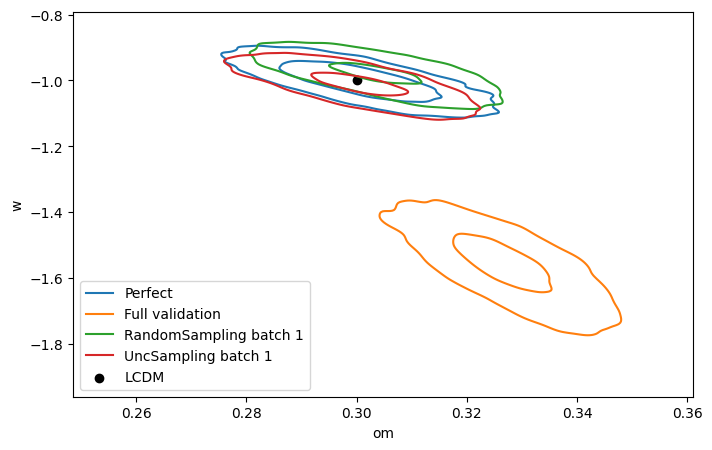

In [5]:
data = pd.concat([data_perf, data_val, data_rand_b1, data_unc_b1], ignore_index=True)
_, ax = plt.subplots(figsize=(8, 5))


g = sns.kdeplot(data=data, x="om", y="w", levels=3, hue='sample', ax=ax)
p = ax.scatter(0.3, -1, marker='o', color='black', label='LCDM')

extra_legend_elements = [p]
handles = ax.legend_.legend_handles

for h, t in zip(handles, ax.legend_.texts):
    h.set_label(t.get_text())  # assign the legend labels to the handles
ax.legend(handles=handles + extra_legend_elements, loc="lower left")
plt.show()